In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
results = pd.read_csv("football_results.csv")

In [3]:
int_results = results[(results['level'] == 'international') & (results['home_continent']=='Europe') &(results['away_continent']=='Europe')]
int_res = int_results.drop(['full_time','home_continent','away_continent','continent','level','home_ident','away_ident'],axis=1)
int_res=int_res[(int_res['competition']=='UEFA EL') | (int_res['competition']=='UEFA CL')]
int_res2018 = int_res[int_res['date'].str.startswith('2018')]

In [4]:
int_res['score']=int_res['gh']-int_res['ga']
int_res.loc[int_res['score'] > 0, 'score'] = 1
int_res.loc[int_res['score'] == 0, 'score'] = 0
int_res.loc[int_res['score'] < 0, 'score'] = -1

In [5]:
int_res.to_csv('International club competitions.csv')

In [6]:
int_res2018 = int_res[int_res['date'].str.startswith('2018')]
int_res['home_country']=int_res.home_country.str.capitalize()
int_res2018['home_country']=int_res2018.home_country.str.capitalize()
val = int_res2018.groupby('home_country')['score'].sum().values

<ipython-input-6-6fa392353a22>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  int_res2018['home_country']=int_res2018.home_country.str.capitalize()


In [8]:
val_coun = int_res2018.groupby('home_country')['score'].sum()
val_coun = val_coun.drop('Macedonia-fyr')

In [11]:
rank = pd.read_csv('fifa_ranking.csv')
rank2018 = rank[(rank['rank_date'].str.startswith('2018')) & (rank['confederation']=='UEFA')]
avg_rank2018 = rank2018.groupby('country_full').mean()['rank']
rankval = np.log(avg_rank2018.values)


Text(0, 0.5, 'log(Nation rank)')

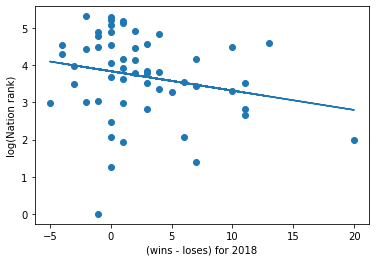

In [12]:
m,b = np.polyfit(val,rankval,1) 
plt.scatter(val,rankval)
plt.plot(val, m*val + b)
plt.xlabel('(wins - loses) for 2018')
plt.ylabel(('log(Nation rank)'))

In [26]:
val =val.reshape(-1, 1)
rankval = rankval.reshape(-1, 1)
rankval.shape

(55, 1)

In [14]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [27]:
reg = LinearRegression()
reg.fit(X=val,y=rankval)
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

The linear model is: Y = 3.8405 + -0.052174X


In [31]:
LinearRegression?

In [29]:
X = val
y = rankval

In [30]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     2.694
Date:                Thu, 18 Nov 2021   Prob (F-statistic):              0.107
Time:                        14:16:50   Log-Likelihood:                -83.393
No. Observations:                  55   AIC:                             170.8
Df Residuals:                      53   BIC:                             174.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8405      0.171     22.513      0.0

In [37]:
res_year= pd.read_csv('results.csv')
res_year[res_year['date'].str.startswith('2018')]
res = res_year.groupby('country').count()
europe_countries = rank2018['country_full'].unique().tolist()
europe_countries.remove('FYR Macedonia')

In [38]:
res_year['win']= res_year['home_score'] - res_year['away_score']
res_year.loc[res_year['win']>0., 'win'] = 1
res_year.loc[res_year['win']==0, 'win'] = 0
res_year.loc[res_year['win']<0, 'win'] = -1
res_home = res_year[res_year['home_team'].isin(europe_countries)]
res_away = res_year[res_year['away_team'].isin(europe_countries)]

In [39]:
home_val = res_home.groupby('home_team')['win'].sum()
home_val.index.unique().size
away_val = res_away.groupby('away_team')['win'].sum()

In [40]:
perform = home_val+ away_val
perform.drop('Republic of Ireland', inplace=True)
perform =perform.append(pd.Series({'Ireland':95})).sort_index()
perform_val = perform.values
perform_val = np.log(perform_val)

Text(0, 0.5, 'win - loses for the Nations')

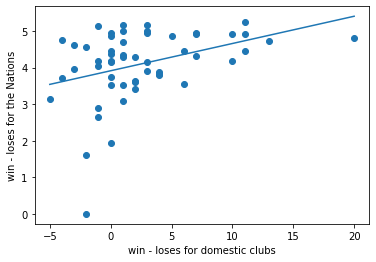

In [41]:
p = np.polyfit(val_coun, perform_val, 1)
x = np.linspace(-5, 20, 100)
y = np.polyval(p, x)
plt.scatter(val_coun, perform_val)
plt.plot(x,y)
plt.xlabel('win - loses for domestic clubs')
plt.ylabel('win - loses for the Nations')

In [71]:
X = np.array(val_coun.values.tolist())
X = X.reshape(-1,1)

In [70]:
y =perform_val.reshape(-1,1)

In [72]:
reg = LinearRegression()
reg.fit(X,y)
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

The linear model is: Y = 3.9129 + 0.074495X


In [73]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     8.313
Date:                Thu, 18 Nov 2021   Prob (F-statistic):            0.00571
Time:                        14:26:19   Log-Likelihood:                -70.534
No. Observations:                  54   AIC:                             145.1
Df Residuals:                      52   BIC:                             149.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9129      0.140     27.962      0.0